### Perceptron

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()

In [5]:
X = iris.data[:,(2,3)] # petal length and petal width

In [6]:
y = (iris.target == 0).astype(np.int) # Iris Setosa

In [7]:
per_clf = Perceptron()

In [8]:
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = per_clf.predict([[2.5,0.5]])

In [10]:
y_pred

array([0])

### MLP with Keras

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
tf.__version__

'2.0.0'

In [14]:
keras.__version__

'2.2.4-tf'

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
model = keras.Sequential()

In [23]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


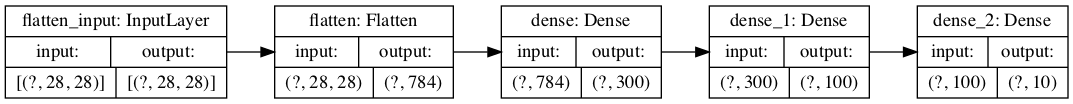

In [28]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,)

In [30]:
model.layers

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04940578, -0.02783052,  0.01483356, ...,  0.07174394,
        -0.0711653 , -0.06513125],
       [-0.00557442, -0.03177856,  0.01801509, ..., -0.04548601,
        -0.0354766 ,  0.02285996],
       [ 0.04340206, -0.02226761,  0.00204062, ..., -0.01108495,
         0.05940284, -0.0368698 ],
       ...,
       [-0.0688239 , -0.02743622,  0.06371485, ...,  0.00964512,
         0.07300888,  0.03725201],
       [-0.00482503, -0.00884669, -0.00031595, ...,  0.01680797,
         0.06686597, -0.02955016],
       [ 0.06459118,  0.01501787, -0.01082584, ..., -0.06740575,
        -0.00421008,  0.04341315]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2228 - accuracy: 0.9194 - val_loss: 0.3065 - val_accuracy: 0.8902
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2196 - accuracy: 0.9208 - val_loss: 0.2943 - val_accuracy: 0.8942
Epoch 3/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2155 - accuracy: 0.9236 - val_loss: 0.2877 - val_accuracy: 0.8946
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.2115 - accuracy: 0.9238 - val_loss: 0.2928 - val_accuracy: 0.8940
Epoch 5/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.2082 - accuracy: 0.9254 - val_loss: 0.3157 - val_accuracy: 0.8850
Epoch 6/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2059 - accuracy: 0.9264 - val_loss: 0.2933 - val_accuracy: 0.8932
Epoch 7/30
55000/55000 [============================

In [44]:
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

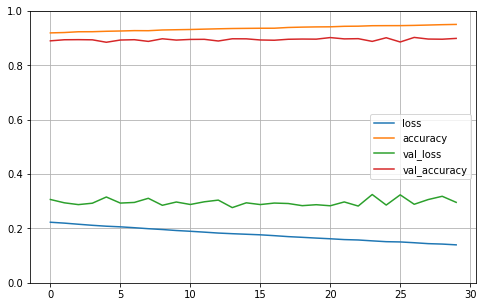

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [47]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[66.50599293966293, 0.862]

In [49]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [51]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [52]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Regression MLP

In [53]:
from sklearn.datasets import fetch_california_housing

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
housing = fetch_california_housing()

In [57]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [70]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd", 
              validation_data=(X_valid, y_valid), 
              metrics=[keras.metrics.MeanSquaredError()])

In [71]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 88us/sample - loss: 0.8203 - mean_squared_error: 0.8203 - val_loss: 0.7063 - val_mean_squared_error: 0.7063
Epoch 2/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.8311 - mean_squared_error: 0.8311 - val_loss: 3.6560 - val_mean_squared_error: 3.6560
Epoch 3/30
11610/11610 [==============================] - 1s 50us/sample - loss: 14.7115 - mean_squared_error: 14.7115 - val_loss: 1.2380 - val_mean_squared_error: 1.2380
Epoch 4/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.8913 - mean_squared_error: 0.8913 - val_loss: 0.5220 - val_mean_squared_error: 0.5220
Epoch 5/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4715 - mean_squared_error: 0.4715 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 6/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4525 - mean_squared_e

In [72]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [74]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [75]:
y_pred

array([[2.8393621 ],
       [2.3898783 ],
       [0.91392225]], dtype=float32)

In [76]:
y_test[:3]

array([1.848, 2.307, 0.598])

### wide and deep network

In [79]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

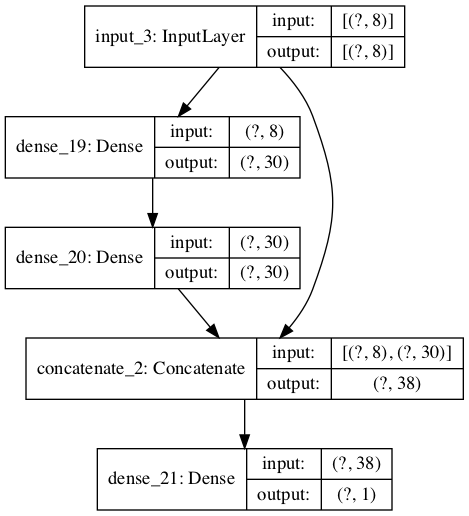

In [81]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,)

### Subclassing API

It's imperative style programming for creating models

In [83]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
        

In [85]:
model = WideAndDeepModel()

In [98]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [99]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 161us/sample - loss: 2.6840 - output_1_loss: 2.4444 - output_2_loss: 4.8353 - val_loss: 1.2633 - val_output_1_loss: 0.9850 - val_output_2_loss: 3.7644
Epoch 2/10
11610/11610 [==============================] - 1s 76us/sample - loss: 1.0076 - output_1_loss: 0.7941 - output_2_loss: 2.9284 - val_loss: 0.9122 - val_output_1_loss: 0.7265 - val_output_2_loss: 2.5802
Epoch 3/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.8126 - output_1_loss: 0.6652 - output_2_loss: 2.1440 - val_loss: 0.7917 - val_output_1_loss: 0.6566 - val_output_2_loss: 2.0056
Epoch 4/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.7301 - output_1_loss: 0.6170 - output_2_loss: 1.7472 - val_loss: 0.7301 - val_output_1_loss: 0.6208 - val_output_2_loss: 1.7122
Epoch 5/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6863 - output_1_loss: 0

### Tensorboard

In [86]:
import os

In [87]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [90]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [100]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_06_12-16_05_14'

In [101]:
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [105]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 134us/sample - loss: 1.8789 - val_loss: 0.8026
Epoch 2/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.7044 - val_loss: 0.6725
Epoch 3/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6207 - val_loss: 0.6142
Epoch 4/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5764 - val_loss: 0.5825
Epoch 5/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5505 - val_loss: 0.5593
Epoch 6/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5299 - val_loss: 0.5415
Epoch 7/30
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5143 - val_loss: 0.5267
Epoch 8/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5024 - val_loss: 0.5150
Epoch 9/30
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4922 - val_

In [107]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

### Fine-Tuning NN Hyperparameters

Create a func that will build and compile a Keras model, given a set of hyperparameters

In [113]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))  
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [114]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [115]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 91us/sample - loss: 1.2744 - val_loss: 0.8154
Epoch 2/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.8289 - val_loss: 0.6829
Epoch 3/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5839 - val_loss: 0.5823
Epoch 4/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5406 - val_loss: 0.5483
Epoch 5/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5172 - val_loss: 0.5273
Epoch 6/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4984 - val_loss: 0.5160
Epoch 7/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4846 - val_loss: 0.4983
Epoch 8/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4744 - val_loss: 0.4884
Epoch 9/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.467

Epoch 76/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3605 - val_loss: 0.3763
Epoch 77/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3620 - val_loss: 0.3760
Epoch 78/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3590 - val_loss: 0.3726
Epoch 79/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3602 - val_loss: 0.3730
Epoch 80/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3637 - val_loss: 0.3719
Epoch 81/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3566 - val_loss: 0.3734
Epoch 82/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3565 - val_loss: 0.3710
Epoch 83/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3557 - val_loss: 0.3720
Epoch 84/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3549 - val_loss: 0.3696
Epoch 85/100
11610/

In [116]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [118]:
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [122]:
rand_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

fit_params = {
    "callbacks" : [
            keras.callbacks.EarlyStopping(patience=10)
        ],
}

rand_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  **fit_params)

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 176us/sample - loss: 3.0686 - val_loss: 1.8297
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 1.3636 - val_loss: 1.0669
Epoch 3/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.9261 - val_loss: 0.8585
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.8062 - val_loss: 0.7937
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7648 - val_loss: 0.7663
Epoch 6/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7429 - val_loss: 0.7485
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7265 - val_loss: 0.7340
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7125 - val_loss: 0.7214
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7000 - val_loss: 0.70

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 113us/sample - loss: 3.5831 - val_loss: 2.2940
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.6269 - val_loss: 1.3443
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.0963 - val_loss: 1.0227
Epoch 4/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.8947 - val_loss: 0.8748
Epoch 5/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7961 - val_loss: 0.7951
Epoch 6/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.7400 - val_loss: 0.7478
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7049 - val_loss: 0.7172
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6799 - val_loss: 0.6949
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6609 - val_loss: 0.67

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 114us/sample - loss: 4.3537 - val_loss: 2.1982
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.6927 - val_loss: 1.2611
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.0444 - val_loss: 0.9378
Epoch 4/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8793 - val_loss: 0.8611
Epoch 5/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.8268 - val_loss: 0.8305
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.8014 - val_loss: 0.8111
Epoch 7/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.7827 - val_loss: 0.7949
Epoch 8/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.7668 - val_loss: 0.7802
Epoch 9/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.7524 - val_loss: 0.76

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.1808 - val_loss: 1.1062
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 4.0900 - val_loss: 14.7402
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 18.1596 - val_loss: 338.6163
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 443.8633 - val_loss: 8286.1403
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 8944.2645 - val_loss: 209173.1146
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 306672.5360 - val_loss: 5081717.5581
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 29533303.3553 - val_loss: 126509992.8431
Epoch 8/100
7740/7740 [==============================] - 0s 45us/sample - loss: 145402931.4822 - val_loss: 3165452943.0693
Epoch 9/100
7740/7740 [=====================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 89us/sample - loss: 1.2987 - val_loss: 0.7769
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5719 - val_loss: 0.7602
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5399 - val_loss: 0.7739
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5216 - val_loss: 0.8120
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5128 - val_loss: 0.8452
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5084 - val_loss: 0.8630
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5038 - val_loss: 0.9051
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5032 - val_loss: 0.9406
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5017 - val_loss: 0.963

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 1.8914 - val_loss: 10.5174
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 11.6830 - val_loss: 258.3125
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1503.2478 - val_loss: 5920.5724
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 7870.7280 - val_loss: 140311.2021
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 809348.7614 - val_loss: 3271107.0593
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 17444930.1004 - val_loss: 76834808.5915
Epoch 7/100
7740/7740 [==============================] - 0s 48us/sample - loss: 493025324.2230 - val_loss: 1790782092.4770
Epoch 8/100
7740/7740 [==============================] - 0s 45us/sample - loss: 2837194512.3194 - val_loss: 42723345328.0083
Epoch 9/100
7740/7740 [==

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.8366 - val_loss: 0.6121
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6519 - val_loss: 0.5098
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4672 - val_loss: 0.4581
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4517 - val_loss: 0.4533
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4187 - val_loss: 0.4289
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3963 - val_loss: 0.3965
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3862 - val_loss: 0.3849
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3742 - val_loss: 0.3772
Epoch 9/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3696 - val_loss: 0.41

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.8416 - val_loss: 0.5819
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5002 - val_loss: 0.4928
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4477 - val_loss: 0.4658
Epoch 4/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4231 - val_loss: 0.4621
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4057 - val_loss: 0.4626
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3953 - val_loss: 0.4513
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3866 - val_loss: 0.4508
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3767 - val_loss: 0.4364
Epoch 9/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3680 - val_loss: 0.44

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 127us/sample - loss: 0.9166 - val_loss: 0.6062
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5184 - val_loss: 0.9459
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9864 - val_loss: 0.4926
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4925 - val_loss: 0.4417
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4208 - val_loss: 0.4042
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3927 - val_loss: 0.3871
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3758 - val_loss: 0.3738
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3663 - val_loss: 0.3677
Epoch 9/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3542 - val_loss: 0.36

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 211us/sample - loss: 1.5919 - val_loss: 0.8429
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7162 - val_loss: 0.6806
Epoch 3/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6247 - val_loss: 0.6140
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5737 - val_loss: 0.5740
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5421 - val_loss: 0.5478
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5204 - val_loss: 0.5273
Epoch 7/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.5045 - val_loss: 0.5127
Epoch 8/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4907 - val_loss: 0.5004
Epoch 9/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4795 - val_loss: 0.49

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 1.5879 - val_loss: 0.9880
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8065 - val_loss: 0.8121
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6807 - val_loss: 0.6986
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5924 - val_loss: 0.6197
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5386 - val_loss: 0.5737
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5083 - val_loss: 0.5464
Epoch 7/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4883 - val_loss: 0.5247
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4748 - val_loss: 0.5104
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4631 - val_loss: 0.49

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 136us/sample - loss: 1.7809 - val_loss: 0.7243
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6381 - val_loss: 0.6228
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5827 - val_loss: 0.5840
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5533 - val_loss: 0.5586
Epoch 5/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5307 - val_loss: 0.5393
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5123 - val_loss: 0.5222
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4966 - val_loss: 0.5074
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4839 - val_loss: 0.4949
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4730 - val_loss: 0.48

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 117us/sample - loss: 1.7780 - val_loss: 1.4439
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 2.3069 - val_loss: 0.8226
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7276 - val_loss: 0.6839
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6390 - val_loss: 0.6203
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5889 - val_loss: 0.5773
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5529 - val_loss: 0.5640
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5263 - val_loss: 0.5207
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5053 - val_loss: 0.5148
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4897 - val_loss: 0.48

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 1.2640 - val_loss: 0.6973
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6308 - val_loss: 0.6246
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5769 - val_loss: 0.5866
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5409 - val_loss: 0.5612
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5151 - val_loss: 0.5473
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4969 - val_loss: 0.5370
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4827 - val_loss: 0.5344
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4730 - val_loss: 0.5325
Epoch 9/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4647 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 113us/sample - loss: 1.7343 - val_loss: 0.9735
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.1547 - val_loss: 1.4882
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.2050 - val_loss: 0.6448
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5993 - val_loss: 0.5996
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5625 - val_loss: 0.5681
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5368 - val_loss: 0.5447
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5183 - val_loss: 0.5282
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5049 - val_loss: 0.5143
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4944 - val_loss: 0.50

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 131us/sample - loss: 1.7586 - val_loss: 0.8180
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8119 - val_loss: 0.6918
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6432 - val_loss: 0.6391
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6023 - val_loss: 0.6032
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5712 - val_loss: 0.5743
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5461 - val_loss: 0.5511
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5260 - val_loss: 0.5323
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5090 - val_loss: 0.5180
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4952 - val_loss: 0.50

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 1.4399 - val_loss: 0.9272
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7015 - val_loss: 0.7692
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6194 - val_loss: 0.6815
Epoch 4/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5675 - val_loss: 0.6200
Epoch 5/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5301 - val_loss: 0.5751
Epoch 6/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5038 - val_loss: 0.5420
Epoch 7/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4843 - val_loss: 0.5182
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4704 - val_loss: 0.5015
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4596 - val_loss: 0.48

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.6447 - val_loss: 0.8446
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7982 - val_loss: 0.7853
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6947 - val_loss: 0.6822
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6356 - val_loss: 0.6450
Epoch 5/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6015 - val_loss: 0.6141
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5737 - val_loss: 0.5868
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5486 - val_loss: 0.5637
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5286 - val_loss: 0.5419
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5102 - val_loss: 0.52

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 193us/sample - loss: 0.8253 - val_loss: 0.6246
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6377 - val_loss: 0.4899
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4635 - val_loss: 0.6837
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4561 - val_loss: 0.4863
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4436 - val_loss: 0.4431
Epoch 6/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.4016 - val_loss: 0.4177
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3907 - val_loss: 0.3829
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3767 - val_loss: 0.3749
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3705 - val_loss: 0.41

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.6645 - val_loss: 0.5164
Epoch 2/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4581 - val_loss: 0.4814
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4240 - val_loss: 0.4652
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4091 - val_loss: 0.4594
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3921 - val_loss: 0.4333
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3850 - val_loss: 0.4325
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3753 - val_loss: 0.4093
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3666 - val_loss: 0.3888
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3615 - val_loss: 0.40

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.6754 - val_loss: 0.6878
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4842 - val_loss: 0.6498
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6230 - val_loss: 0.4386
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4147 - val_loss: 0.4211
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4284 - val_loss: 0.3857
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3830 - val_loss: 0.3736
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3677 - val_loss: 0.3633
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3575 - val_loss: 0.3619
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3489 - val_loss: 0.37

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 114us/sample - loss: 1.0457 - val_loss: 0.5919
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5265 - val_loss: 0.4971
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4837 - val_loss: 0.4672
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4570 - val_loss: 0.4633
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5010 - val_loss: 0.4556
Epoch 6/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4427 - val_loss: 0.4426
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4336 - val_loss: 0.4380
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4893 - val_loss: 0.7271
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5536 - val_loss: 0.52

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.8369 - val_loss: 0.5805
Epoch 2/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5182 - val_loss: 0.5181
Epoch 3/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4772 - val_loss: 0.4832
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4561 - val_loss: 0.4631
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4462 - val_loss: 0.4858
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4425 - val_loss: 0.4517
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4357 - val_loss: 0.4576
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4340 - val_loss: 0.4578
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4293 - val_loss: 0.45

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 106us/sample - loss: 0.9379 - val_loss: 1.0114
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5692 - val_loss: 0.5662
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9966 - val_loss: 1.2726
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6761 - val_loss: 0.5140
Epoch 5/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4823 - val_loss: 0.4811
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4649 - val_loss: 0.4717
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4985 - val_loss: 0.5087
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4746 - val_loss: 0.4757
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4495 - val_loss: 0.45

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 122us/sample - loss: 1.2339 - val_loss: 0.7225
Epoch 2/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.8138 - val_loss: 0.5932
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5621 - val_loss: 0.5356
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5075 - val_loss: 0.5057
Epoch 5/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4817 - val_loss: 0.4829
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4606 - val_loss: 0.4700
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4455 - val_loss: 0.4479
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4308 - val_loss: 0.4493
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4219 - val_loss: 0.43

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 130us/sample - loss: 0.9043 - val_loss: 0.6822
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5347 - val_loss: 0.5656
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4861 - val_loss: 0.5004
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4625 - val_loss: 0.4713
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4456 - val_loss: 0.4613
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4335 - val_loss: 0.4552
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4232 - val_loss: 0.4564
Epoch 8/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4159 - val_loss: 0.4562
Epoch 9/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4078 - val_loss: 0.46

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 123us/sample - loss: 1.4609 - val_loss: 0.9858
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.8240 - val_loss: 0.9599
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.8902 - val_loss: 0.6216
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6416 - val_loss: 0.4838
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4639 - val_loss: 0.4568
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4390 - val_loss: 0.4449
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4250 - val_loss: 0.4309
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4163 - val_loss: 0.4228
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4075 - val_loss: 0.42

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 233us/sample - loss: 2.1763 - val_loss: 0.9844
Epoch 2/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.8803 - val_loss: 0.7562
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.6962 - val_loss: 0.6815
Epoch 4/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.6423 - val_loss: 0.6372
Epoch 5/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.6058 - val_loss: 0.6055
Epoch 6/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.5751 - val_loss: 0.5750
Epoch 7/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.5510 - val_loss: 0.5527
Epoch 8/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.5298 - val_loss: 0.5333
Epoch 9/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.5128 - val_loss: 0.

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 166us/sample - loss: 1.5361 - val_loss: 0.9955
Epoch 2/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.7415 - val_loss: 0.7891
Epoch 3/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.6604 - val_loss: 0.7034
Epoch 4/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.6123 - val_loss: 0.6469
Epoch 5/100
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5760 - val_loss: 0.6045
Epoch 6/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5482 - val_loss: 0.5710
Epoch 7/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.5257 - val_loss: 0.5464
Epoch 8/100
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5085 - val_loss: 0.5275
Epoch 9/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.4944 - val_loss

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 175us/sample - loss: 1.6315 - val_loss: 0.8475
Epoch 2/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.7972 - val_loss: 0.7605
Epoch 3/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.6967 - val_loss: 0.6528
Epoch 4/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.6251 - val_loss: 0.6154
Epoch 5/100
7740/7740 [==============================] - 1s 107us/sample - loss: 0.5826 - val_loss: 0.5816
Epoch 6/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.5554 - val_loss: 0.5559
Epoch 7/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.5306 - val_loss: 0.5321
Epoch 8/100
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5133 - val_loss: 0.5141
Epoch 9/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.4970 - val_loss

Epoch 77/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.3538 - val_loss: 0.3734
Epoch 78/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.3535 - val_loss: 0.3698
Epoch 79/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.3527 - val_loss: 0.3683
Epoch 80/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3516 - val_loss: 0.3681
Epoch 81/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3507 - val_loss: 0.3709
Epoch 82/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.3507 - val_loss: 0.3679
Epoch 83/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.3493 - val_loss: 0.3666
Epoch 84/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.3489 - val_loss: 0.3667
Epoch 85/100
7740/7740 [==============================] - 1s 103us/sample - loss: 0.3490 - val_loss: 0.3647
Epoch 86/100
7740/7740 [=======

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x1a6d571b90>, as the constructor either does not set or modifies parameter learning_rate

In [124]:
rand_search_cv.best_params_

{'learning_rate': 0.006494592908587768, 'n_hidden': 2, 'n_neurons': 52}

In [126]:
rand_search_cv.best_score_

-0.33093074881034507

## Ex 10 MNIST DNN

In [129]:
keras.backend.clear_session()

In [130]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [131]:
X_train_full.shape

(60000, 28, 28)

In [132]:
X_test.shape

(10000, 28, 28)

In [142]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

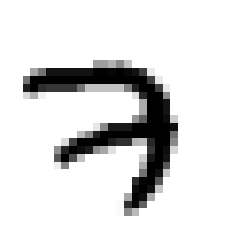

In [143]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

Let's take a look at some sample images

In [144]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

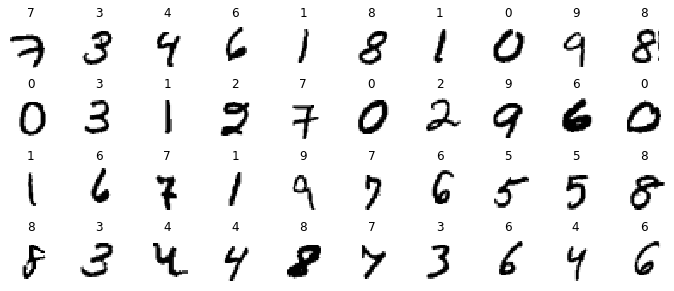

In [145]:
rows = 4
cols = 10
plt.figure(figsize=(cols * 1.2, rows * 1.2))

for r in range(rows):
    for c in range(cols):
        index = cols * r + c
        plt.subplot(rows, cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest", cmap="binary")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [157]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [158]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### Model

In [159]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")    
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [160]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Train model for 1 epoch

In [161]:
history = model.fit(X_train, y_train,  
                    epochs=1, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 10s 176us/sample - loss: nan - accuracy: 0.5716 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

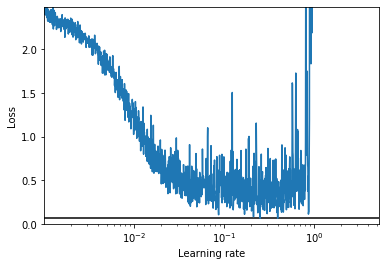

In [162]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently around 3e-1, so let's try using 2e-1 as our learning rate:

In [163]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [165]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [166]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [167]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [168]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 6s 115us/sample - loss: 0.2309 - accuracy: 0.9274 - val_loss: 0.0962 - val_accuracy: 0.9722
Epoch 2/100
55000/55000 [==============================] - 5s 100us/sample - loss: 0.0943 - accuracy: 0.9710 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 3/100
55000/55000 [==============================] - 6s 102us/sample - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 4/100
55000/55000 [==============================] - 6s 108us/sample - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0674 - val_accuracy: 0.9786
Epoch 5/100
55000/55000 [==============================] - 6s 106us/sample - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0937 - val_accuracy: 0.9716
Epoch 6/100
55000/55000 [==============================] - 6s 104us/sample - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 7/100
55000/55000 [====================

In [169]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.872162394332886, 0.0892]

In [170]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
